In [90]:
using Plots

In [89]:
function load_data(path)
    path = "C:/Users/jfl-1/Downloads/ep1/EP1_MAC219-main/results/" #mudar depois
    seq_sem = Dict()
    seq_com = Dict()
    pth = Dict()
    omp = Dict()
    for dir in readdir(path)
        for file in readdir(path * dir)
            full_path = path * "/" * dir * "/" * file
            open(full_path) do f
                if (occursin("_parsed.log", file))
                    filename = rsplit(file, ".")[1]
                    s = read(f, String)
                    splitted = rsplit(s, "\n")
                    splitted_ = []
                    data = []
                    for line in splitted
                        if (length(line) > 1)
                            x = rsplit(line, " ")
                            nums = [[parse(Float64, x[1]), parse(Float64, x[2])]]
                            append!(data, nums)
                        end
                    end
                    filename = replace(filename, "_parsed" => "")
                    if (occursin("seq_SEM", dir))
                        seq_sem[filename] = data

                    elseif (occursin("seq", dir))
                        seq_com[filename] = data

                    elseif (occursin("pth", dir))
                        pth[filename] = data

                    elseif (occursin("omp", dir))
                        omp[filename] = data
                    end
                end
            end
        end
    end
    return [seq_sem, seq_com, pth, omp]
end


load_data (generic function with 1 method)

In [112]:
function confidence_interval(mean, std)
    # N = 10
    return std/sqrt(10)*1.96
end


confidence_interval (generic function with 1 method)

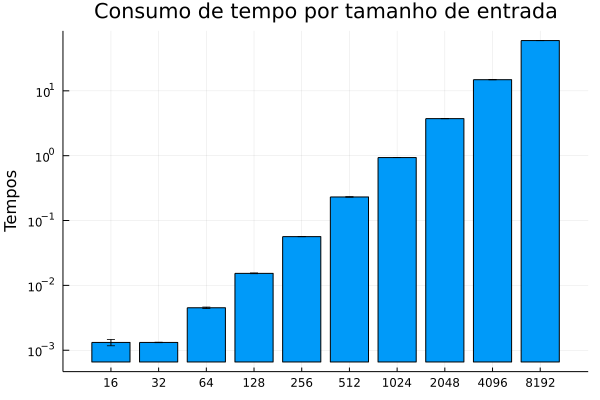

In [124]:
# plot error -> yerror
datasets = load_data("")[1]
yerror = []
times = []
ns = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4096", "8192"]

for data in dataset["seahorse"]
    append!(yerror, confidence_interval(data[1], data[2]))
    append!(times, data[1])
end

bar(ns, times, yaxis=:log, yerr = yerror, ylabel = "Tempos", 
        title = "Consumo de tempo por tamanho de entrada", legend=false)